Pro. Fernando Amaral  -  [www.eia.ai](https://www.eia.ai)

In [ ]:
#gpu

In [4]:
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 6.2 MB/s eta 0:00:00


In [1]:
!pip install diffusers transformers safetensors accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.3 MB/s eta 0:00:00


In [5]:
import torch
from diffusers import DiffusionPipeline,StableDiffusionPipeline, EulerDiscreteScheduler
import matplotlib.pyplot as plt
from peft import PeftModel

## Pixel Art

In [3]:
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ValueError: PEFT backend is required for this method.

In [7]:
pipeline.load_lora_weights("nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors")
imagem = pipeline( "pixel art arcade aircraft", num_inference_steps=100).images[0]

ValueError: PEFT backend is required for this method.

NameError: name 'imagem' is not defined

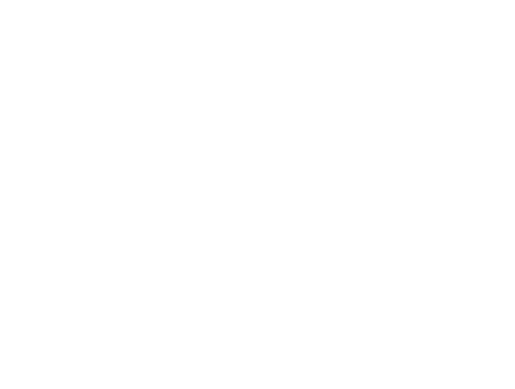

In [9]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Caricaturas

In [10]:
base_model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipeline = DiffusionPipeline.from_pretrained(base_model_id, variant="fp16", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("Norod78/SDXL-Caricaturized-Lora", weight_name="SDXL-Caricaturized-Lora.safetensors")
imagem = pipeline( "Klaus Meine Caricaturized Very detailed, clean, high quality, sharp image.").images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ValueError: PEFT backend is required for this method.

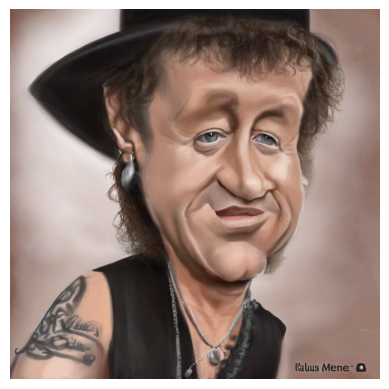

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Robôs

In [11]:
prompt = "A realistic image of a Robot with a gun."
num_inference_steps=32
guidance_scale=5.0

In [12]:
scheduler = EulerDiscreteScheduler.from_pretrained("nousr/robo-diffusion-2-base", subfolder="scheduler")
pipeline = StableDiffusionPipeline.from_pretrained("nousr/robo-diffusion-2-base", scheduler=scheduler,
                                                   torch_dtype=torch.float16).to("cuda")
imagem = pipeline(prompt=prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/742 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nousr--robo-diffusion-2-base/snapshots/5ecf5c9f4d7c650dc9092114405d462336ca1112/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nousr--robo-diffusion-2-base/snapshots/5ecf5c9f4d7c650dc9092114405d462336ca1112/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nousr--robo-diffusion-2-base/snapshots/5ecf5c9f4d7c650dc9092114405d462336ca1112/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nousr--robo-diffusion-2-base/snapshots/5ecf5c9f4d7c650dc9092114405d462336ca1112/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `

  0%|          | 0/32 [00:00<?, ?it/s]

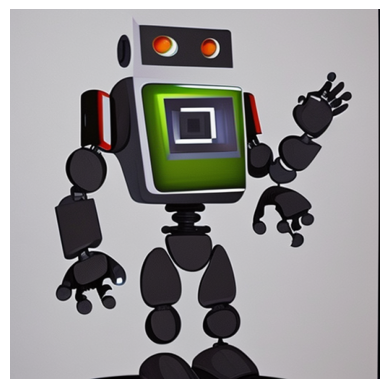

In [13]:
plt.axis('off')
plt.imshow(imagem)
plt.show()